# PU-learning

In [ ]:
# Design plan

# 1) Argparse input
# 2) Input pre-processing
# 3) ML stage
# 4) Additional output: pdfs 

# 1) Argparse input

**Functionality:**

- Input file path
- Output file path
- True genes path
- Pdfs
- ML settings: Choose model, SMOTE, parameters, class_imbalanced procentage
- Some summary

# 2) Input preprocessing

In [47]:
import pandas as pd
from InputProcessingFunctions import *
example = pd.read_csv('../postgap/tmp/output/200_250_filtered_gwas_signal_postgap.txt', sep=',')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [48]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

In [49]:
mem_usage(example)

'25.14 MB'

In [50]:
list(example)

dtypes = example.dtypes
dtypes_col = dtypes.index
dtypes_type = [i.name for i in dtypes.values]
column_types = dict(zip(dtypes_col, dtypes_type))
# rather than print all 161 items, we'll
# sample 10 key/value pairs from the dict
# and print it nicely using prettyprint
preview = first2pairs = {key:value for key,value in list(column_types.items())}
print(preview)

{'ld_snp_rsID': 'object', 'chrom': 'object', 'pos': 'int64', 'GRCh38_chrom': 'int64', 'GRCh38_pos': 'int64', 'afr': 'float64', 'amr': 'float64', 'eas': 'float64', 'eur': 'float64', 'sas': 'float64', 'gnomad': 'float64', 'gnomad_sas': 'float64', 'gnomad_oth': 'float64', 'gnomad_asj': 'float64', 'gnomad_nfe': 'float64', 'gnomad_afr': 'float64', 'gnomad_amr': 'float64', 'gnomad_fin': 'float64', 'gnomad_eas': 'float64', 'gene_symbol': 'object', 'gene_id': 'object', 'gene_chrom': 'int64', 'gene_tss': 'int64', 'GRCh38_gene_chrom': 'int64', 'GRCh38_gene_pos': 'int64', 'disease_name': 'object', 'disease_efo_id': 'object', 'score': 'float64', 'rank': 'int64', 'r2': 'float64', 'cluster_id': 'float64', 'gwas_source': 'object', 'gwas_snp': 'object', 'gwas_pvalue': 'float64', 'gwas_pvalue_description': 'object', 'gwas_odds_ratio': 'object', 'gwas_odds_ratio_ci_start': 'object', 'gwas_odds_ratio_ci_end': 'object', 'gwas_beta': 'float64', 'gwas_size': 'int64', 'gwas_pmid': 'object', 'gwas_study': 'ob

In [59]:
preview = {'afr': 'float16',
           'amr': 'float16',
           'eas': 'float16',
           'eur': 'float16',
           'sas': 'float16',
           'gnomad': 'float16',
           'gnomad_sas': 'float16',
           'gnomad_oth': 'float16',
           'gnomad_asj': 'float16',
           'gnomad_nfe': 'float16',
           'gnomad_afr': 'float16',
           'gnomad_amr': 'float16',
           'gnomad_fin': 'float16',
           'gnomad_eas': 'float16',
           'GTEx_Thyroid': 'float32',
           'GTEx_Testis': 'float32',
           'GTEx_Small_Intestine_Terminal_Ileum': 'float32',
           'GTEx_Nerve_Tibial': 'float32',
           'GTEx_Brain_Frontal_Cortex_BA9': 'float32',
           'GTEx_Skin_Not_Sun_Exposed_Suprapubic': 'float32',
           'GTEx_Vagina': 'float32',
           'GTEx_Whole_Blood': 'float32',
           'GTEx_Breast_Mammary_Tissue': 'float32',
           'GTEx_Ovary': 'float32',
           'GTEx_Adipose_Subcutaneous': 'float32',
           'GTEx_Adrenal_Gland': 'float32',
           'GTEx_Heart_Atrial_Appendage': 'float32',
           'GTEx_Stomach': 'float32',
           'GTEx_Brain_Caudate_basal_ganglia': 'float32',
           'GTEx_Colon_Transverse': 'float32',
           'GTEx_Brain_Cerebellum': 'float32',
           'GTEx_Cells_Transformed_fibroblasts': 'float32',
           'GTEx_Esophagus_Muscularis': 'float32',
           'GTEx_Liver': 'float32',
           'GTEx_Muscle_Skeletal': 'float32',
           'GTEx_Prostate': 'float32',
           'GTEx_Pancreas': 'float32',
           'GTEx_Brain_Hypothalamus': 'float32',
           'GTEx_Spleen': 'float32',
           'GTEx_Colon_Sigmoid': 'float32',
           'GTEx_Brain_Anterior_cingulate_cortex_BA24': 'float32',
           'GTEx_Esophagus_Gastroesophageal_Junction': 'float32',
           'GTEx_Brain_Hippocampus': 'float32',
           'GTEx_Brain_Cortex': 'float32',
           'GTEx_Heart_Left_Ventricle': 'float32',
           'GTEx_Artery_Tibial': 'float32',
           'GTEx_Uterus': 'float32',
           'GTEx_Pituitary': 'float32',
           'GTEx_Cells_EBV-transformed_lymphocytes': 'float32',
           'GTEx_Artery_Coronary': 'float32',
           'GTEx_Adipose_Visceral_Omentum': 'float32',
           'GTEx_Brain_Nucleus_accumbens_basal_ganglia': 'float32',
           'GTEx_Brain_Cerebellar_Hemisphere': 'float32',
           'GTEx_Esophagus_Mucosa': 'float32',
           'GTEx_Artery_Aorta': 'float32',
           'GTEx_Brain_Putamen_basal_ganglia': 'float32',
           'GTEx_Lung': 'float32',
           'GTEx_Skin_Sun_Exposed_Lower_leg': 'float32',
           'GTEx': 'float32',
           'VEP': 'uint8',
           'Nearest': 'uint8'}

In [62]:
read_and_optimized = drop_columns(pd.read_csv('../postgap/tmp/output/200_250_filtered_gwas_signal_postgap.txt', sep=',', dtype=preview))
mem_usage(read_and_optimized)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


'6.12 MB'

In [61]:
read_and_optimized

,ld_snp_rsID,chrom,pos,GRCh38_chrom,GRCh38_pos,afr,amr,eas,eur,sas,...,GTEx_Skin_Sun_Exposed_Lower_leg,GTEx,VEP,Fantom5,DHS,PCHiC,Nearest,Regulome,VEP_reg,GERP
0,rs35844274,X,73517138,1,73051455,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0,0,0,0,1,0,0,-0.0965
1,rs35844274,1,73517138,1,73051455,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0,0,0,0,1,0,0,-0.0965
2,rs35844274,1,73517138,1,73051455,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0,0,0,0,1,0,0,-0.0965
3,rs35844274,1,73517138,1,73051455,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0,0,0,0,1,0,0,-0.0965
4,rs35844274,1,73517138,1,73051455,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0,0,0,0,1,0,0,-0.0965
5,rs35844274,1,73517138,1,73051455,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0,0,0,0,1,0,0,-0.0965
6,rs35844274,1,73517138,1,73051455,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0,0,0,0,1,0,0,-0.0965
7,rs35844274,1,73517138,1,73051455,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0,0,0,0,1,0,0,-0.0965
8,rs35234440,1,73603005,1,73137322,0.057495,0.544922,0.154785,0.555664,0.395752,...,0.000000,0.000000,0,0,0,0,1,0,0,1.1185
9,rs35234440,1,73603005,1,73137322,0.057495,0.544922,0.154785,0.555664,0.395752,...,0.000000,0.000000,0,0,0,0,1,0,0,1.1185


In [30]:
example

,ld_snp_rsID,chrom,pos,GRCh38_chrom,GRCh38_pos,afr,amr,eas,eur,sas,...,GTEx_Skin_Sun_Exposed_Lower_leg,GTEx,VEP,Fantom5,DHS,PCHiC,Nearest,Regulome,VEP_reg,GERP
0,rs35844274,1,73517138,1,73051455,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0,0,0,0,1.0,0,0.0,-0.0965
1,rs35844274,1,73517138,1,73051455,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0,0,0,0,1.0,0,0.0,-0.0965
2,rs35844274,1,73517138,1,73051455,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0,0,0,0,1.0,0,0.0,-0.0965
3,rs35844274,1,73517138,1,73051455,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0,0,0,0,1.0,0,0.0,-0.0965
4,rs35844274,1,73517138,1,73051455,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0,0,0,0,1.0,0,0.0,-0.0965
5,rs35844274,1,73517138,1,73051455,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0,0,0,0,1.0,0,0.0,-0.0965
6,rs35844274,1,73517138,1,73051455,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0,0,0,0,1.0,0,0.0,-0.0965
7,rs35844274,1,73517138,1,73051455,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0,0,0,0,1.0,0,0.0,-0.0965
8,rs35234440,1,73603005,1,73137322,0.0575,0.5447,0.1548,0.5557,0.3957,...,0.000000,0.000000,0,0,0,0,1.0,0,0.0,1.1185
9,rs35234440,1,73603005,1,73137322,0.0575,0.5447,0.1548,0.5557,0.3957,...,0.000000,0.000000,0,0,0,0,1.0,0,0.0,1.1185


In [22]:
import numpy as np
int_types = ["float16", "float32", "float64"]
for it in int_types:
    print(np.finfo(it))

Machine parameters for float16
---------------------------------------------------------------
precision =   3   resolution = 1.00040e-03
machep =    -10   eps =        9.76562e-04
negep =     -11   epsneg =     4.88281e-04
minexp =    -14   tiny =       6.10352e-05
maxexp =     16   max =        6.55040e+04
nexp =        5   min =        -max
---------------------------------------------------------------

Machine parameters for float32
---------------------------------------------------------------
precision =   6   resolution = 1.0000000e-06
machep =    -23   eps =        1.1920929e-07
negep =     -24   epsneg =     5.9604645e-08
minexp =   -126   tiny =       1.1754944e-38
maxexp =    128   max =        3.4028235e+38
nexp =        8   min =        -max
---------------------------------------------------------------

Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   e

# 3) ML step

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
gtex_frames = pd.read_csv('/home/nikita/Desktop/gtex_frames_200819.tsv', sep='\t')
true_genes = pd.read_csv('/home/nikita/Documents/work/git_projects/GWASPriors/SCZ/SCZ/true_genes.csv')
scz_genes = set(true_genes[true_genes['Gene(s)'].map(lambda x: ',' not in str(x))]['Gene(s)']) & set(gtex_frames['gene_symbol'])

In [277]:
for i in set(true_genes[true_genes['Gene(s)'].map(lambda x: ',' not in str(x))]['Gene(s)']):
    print(i)

nan
CACNB2
GPM6A
RIMS1
CNKSR2
TBC1D5
GRAMD1B
AC005477.1 RGS6
PODXL
GRM3
C12orf42
CUL3
CYP26B1
SLC39A8
MAN2A1
HCN1
TSNARE1
IGSF9B
NLGN4X
SNAP91
TLE1
TRANK1
C11orf87
TCF4
VPS14C
MEF2C
CACNA1I
CA8 
DRD2
PCGEM1
TLE3
GRIN2A
CSMD1
GRIA1 
KCNV1
MIR548AJ2
MMP16
SATB2
LRRIQ3
ZNF536
CACNA1C
ERCC4
PJA1
MAD1L1
EPC2
ZSWIM6
IMMP2L
TMTC1
CNTN4
FUT9
xMHC
PLCH2
ZNF804A
ATP2A2
C12orf79
FAM5B
LUZP2
SNX19
PRKD1
GALNT10
BCL11B


In [3]:
def return_x_y(gtex_frames, scz_genes):
    y = gtex_frames['gene_symbol'].map(lambda x: 1 if x in scz_genes else 0)
    gtex_frames.drop('gene_id', axis=1, inplace=True)
    x = gtex_frames.fillna(0).set_index('gene_symbol')
    return x, y

x, y = return_x_y(gtex_frames, scz_genes)

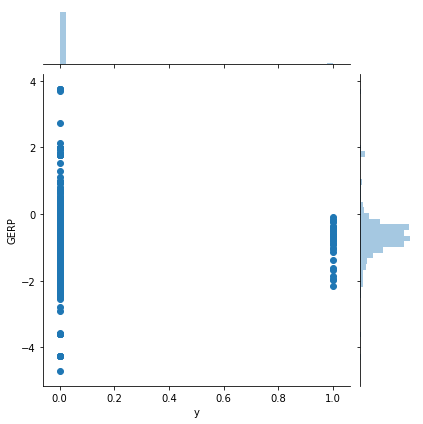

In [4]:
new_x = x.copy() 
new_x['y'] = list(y)
sns.jointplot(data = new_x, x = 'y', y='GERP')

In [5]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

#x_norm = scale(x)
X_train, X_test, y_train, y_test =  train_test_split(x, y, 
                                                     test_size=0.35, 
                                                     random_state=41)

In [6]:
from imblearn.over_sampling import SMOTE
from collections import Counter

def return_SMOTE(X_train, y_train, ratio=0.5):
    sampler = SMOTE(ratio=0.5, random_state=42)
    X_rs, y_rs = sampler.fit_sample(X_train, y_train)
    return X_rs, y_rs

if sum(y_train)/len(y_train) <= 0.3:
    new_X_train, new_y_train = return_SMOTE(X_train, y_train)

In [7]:
rf = RandomForestClassifier(random_state=42)

In [9]:
def best_parameters(model, new_X_train, new_y_train, param_dist):
    cv_rf = GridSearchCV(rf, cv = 5,
                     param_grid=param_dist, 
                     n_jobs = 3)
    cv_rf.fit(new_X_train, new_y_train)
    print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
    return cv_rf.best_params_
    
    

In [11]:
PARAM_DIST = {'max_depth': [5, 10, 15, 20, 30, 50, 100],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy'],
#               'min_samples_leaf': [1, 2, 4],
#               'min_samples_split': [2, 5, 10],
#               'bootstrap' : [True, False],
#              'n_estimators' : [200, 400, 600, 800, 1000, 1200]
               }

parameters = best_parameters(rf, new_X_train, new_y_train, PARAM_DIST)

Best Parameters using grid search: 
 {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto'}


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [12]:
rf.set_params(bootstrap = True,
              criterion = parameters['criterion'],
              max_depth = parameters['max_depth'],
              max_features = parameters['max_features'],
              min_samples_leaf = 1,
              min_samples_split = 2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [20]:
def error_rate_dict(new_X_train, new_y_train, min_estimators = 15, max_estimators = 1000):
    error_rate = {}
    for i in range(min_estimators, max_estimators + 1):
        rf.set_params(n_estimators=i)
        rf.fit(new_X_train, new_y_train)
        oob_error = 1 - rf.oob_score_
        error_rate[i] = oob_error
    return error_rate

In [21]:
rf.set_params(warm_start=True, oob_score=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=True, random_state=42, verbose=0, warm_start=True)

In [22]:
error_rate = error_rate_dict(new_X_train, new_y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Text(0.5,1,'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

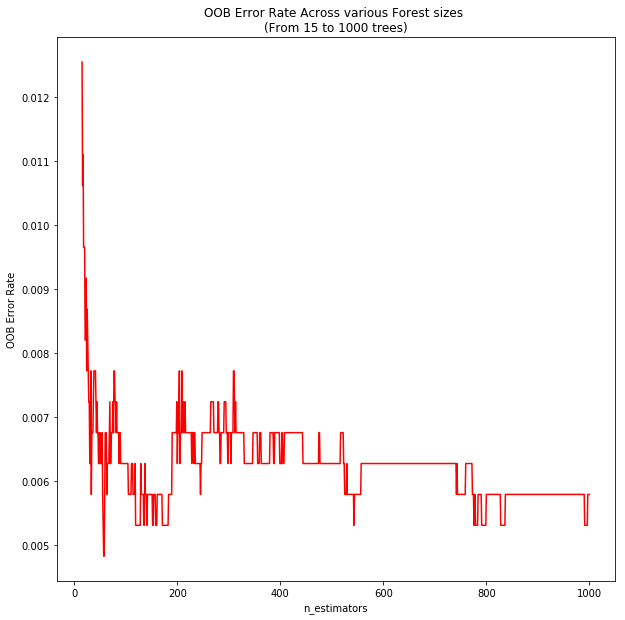

In [23]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#plt.style.use('ggplot')

# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

fig, ax = plt.subplots(figsize=(10, 10))

#ax.set_axis_bgcolor('#fafafa')

oob_series.plot(kind='line',
                color = 'red')

plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [13]:
rf.set_params(n_estimators=800,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [14]:
rf.fit(new_X_train, new_y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [15]:
y_pred = rf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[744,   2],
       [  6,   4]])

# After feature selection

In [17]:
import numpy as np

names_index = list(x)

def variable_importance(fit):
    """
    Purpose
    ----------
    Checks if model is fitted CART model then produces variable importance
    and respective indices in dictionary.

    Parameters
    ----------
    * fit:  Fitted model containing the attribute feature_importances_

    Returns
    ----------
    Dictionary containing arrays with importance score and index of columns
    ordered in descending order of importance.
    """
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

var_imp_rf = variable_importance(rf)

importances_rf = var_imp_rf['importance']

indices_rf = var_imp_rf['index']

def print_var_importance(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints dependent variable names ordered from largest to smallest
    based on information gain for CART model.
    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns
    ----------
    Prints feature importance in descending order
    """
    print("Feature ranking:")

    for f in range(0, indices.shape[0]):
        i = f
        print("{0}. The feature '{1}' has a Mean Decrease in Impurity of {2:.5f}"
              .format(f + 1,
                      names_index[indices[i]],
                      importance[indices[f]]))

print_var_importance(importances_rf, indices_rf, names_index)

Feature ranking:
1. The feature 'rank' has a Mean Decrease in Impurity of 0.14041
2. The feature 'score' has a Mean Decrease in Impurity of 0.12926
3. The feature 'Nearest' has a Mean Decrease in Impurity of 0.12030
4. The feature 'vep_sum' has a Mean Decrease in Impurity of 0.06909
5. The feature 'vep_mean' has a Mean Decrease in Impurity of 0.05406
6. The feature 'VEP' has a Mean Decrease in Impurity of 0.05259
7. The feature 'Brain - Amygdala' has a Mean Decrease in Impurity of 0.02077
8. The feature 'Brain - Hippocampus' has a Mean Decrease in Impurity of 0.02072
9. The feature 'Brain - Putamen (basal ganglia)' has a Mean Decrease in Impurity of 0.01739
10. The feature 'Brain - Frontal Cortex (BA9)' has a Mean Decrease in Impurity of 0.01588
11. The feature 'VEP_reg' has a Mean Decrease in Impurity of 0.01572
12. The feature 'Brain - Cortex' has a Mean Decrease in Impurity of 0.01269
13. The feature 'Brain - Anterior cingulate cortex (BA24)' has a Mean Decrease in Impurity of 0.012

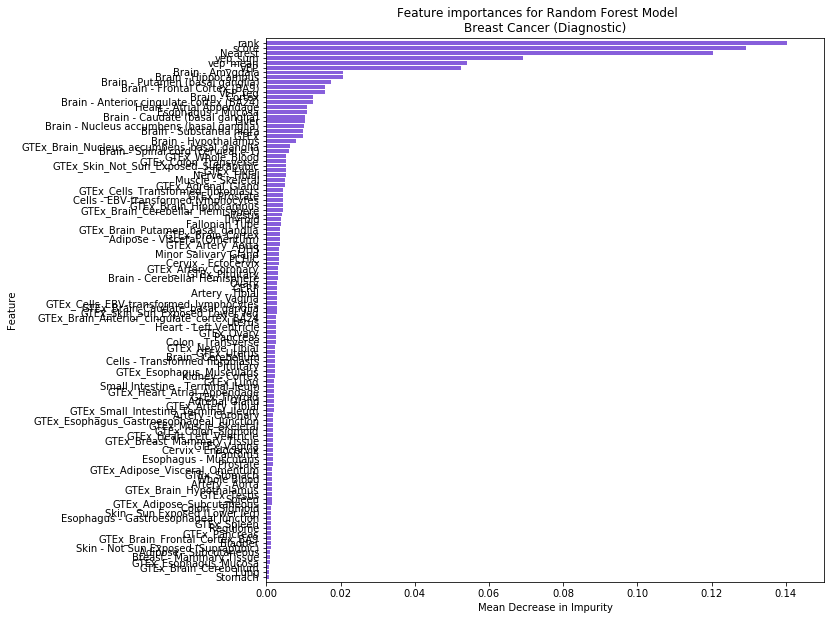

In [18]:
def variable_importance_plot(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints bar chart detailing variable importance for CART model
    NOTE: feature_space list was created because the bar chart
    was transposed and index would be in incorrect order.

    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns:
    ----------
    Returns variable importance plot in descending order
    """
    index = np.arange(len(names_index))

    importance_desc = sorted(importance)
    feature_space = []
    for i in range(indices.shape[0] - 1, -1, -1):
        feature_space.append(names_index[indices[i]])

    fig, ax = plt.subplots(figsize=(10, 10))

    plt.title('Feature importances for Random Forest Model\
    \nBreast Cancer (Diagnostic)')
    plt.barh(index,
             importance_desc,
             align="center",
             color = '#875FDB')
    plt.yticks(index,
               feature_space)

    plt.ylim(-1, 110)
    plt.xlim(0, max(importance_desc) + 0.01)
    plt.xlabel('Mean Decrease in Impurity')
    plt.ylabel('Feature')

    plt.show()
    plt.close()

variable_importance_plot(importances_rf, indices_rf, names_index)

In [19]:
X_train_reduced = X_train.iloc[:,var_imp_rf['index'][:25]]
X_test_reduced = X_test.iloc[:,var_imp_rf['index'][:25]]

In [20]:
next_X_train, next_y_train = return_SMOTE(X_train_reduced, y_train)

In [21]:
rf = RandomForestClassifier(random_state=42)

In [22]:
new_parameters = best_parameters(rf, next_X_train, next_y_train, PARAM_DIST)

Best Parameters using grid search: 
 {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto'}


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [232]:
rf.set_params(criterion = new_parameters['criterion'], 
              max_depth = new_parameters['max_depth'], 
              max_features = new_parameters['max_features'],
              n_estimators=800,
              bootstrap=True,
              warm_start=False, 
              oob_score=False,
              min_samples_leaf = 1,
              min_samples_split = 2,
              class_weight = {1:.9, 0:.3})

RandomForestClassifier(bootstrap=True, class_weight={1: 0.9, 0: 0.3},
            criterion='entropy', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=800, n_jobs=None, oob_score=False,
            random_state=42, verbose=0, warm_start=False)

In [233]:
rf.fit(next_X_train, next_y_train)

RandomForestClassifier(bootstrap=True, class_weight={1: 0.9, 0: 0.3},
            criterion='entropy', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=800, n_jobs=None, oob_score=False,
            random_state=42, verbose=0, warm_start=False)

In [247]:
from sklearn.calibration import CalibratedClassifierCV
calib_model = CalibratedClassifierCV(rf, cv='prefit', method='sigmoid')
calib_model.fit(next_X_train, next_y_train)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True, class_weight={1: 0.9, 0: 0.3},
            criterion='entropy', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=800, n_jobs=None, oob_score=False,
            random_state=42, verbose=0, warm_start=False),
            cv='prefit', method='sigmoid')

In [248]:
y_pred = calib_model.predict(X_test_reduced)
confusion_matrix(y_test, y_pred)

array([[744,   2],
       [  5,   5]])

# PU learning

In [249]:
new_x = x.iloc[:,var_imp_rf['index'][:25]]

In [250]:
n_estimators = 1000
estimator = calib_model

In [251]:
iP = y[y > 0].index
iU = y[y <= 0].index

In [252]:
num_oob = pd.DataFrame(np.zeros(shape = y.shape), index = y.index)
sum_oob = pd.DataFrame(np.zeros(shape = y.shape), index = y.index)

In [253]:
from numba import njit

In [254]:
ml_list = [estimator, new_x, y]

In [255]:
def final_output(ml_list, n_estimators=100):
    
    estimator = ml_list[0]
    new_x = ml_list[1]
    y = ml_list[2]
    iP = y[y > 0].index
    iU = y[y <= 0].index
    num_oob = pd.DataFrame(np.zeros(shape = y.shape), index = y.index)
    sum_oob = pd.DataFrame(np.zeros(shape = y.shape), index = y.index)
    
    for _ in range(n_estimators):
        # Get a bootstrap sample of unlabeled points for this round
        ib = np.random.choice(iU, replace = True, size = 3 * len(iP))
    
        # Find the OOB data points for this round
        i_oob = list(set(iU) - set(ib))
    
        # Get the training data (ALL positives and the bootstrap
        # sample of unlabeled points) and build the tree
        Xb = new_x[list(y>0)].append(new_x.iloc[ib])
        yb = y[y > 0].append(y.iloc[ib])
        estimator.fit(Xb, yb)
    
        # Record the OOB scores from this round
        sum_oob.loc[i_oob, 0] += estimator.predict_proba(new_x.iloc[i_oob])[:,1]
        num_oob.loc[i_oob, 0] += 1
    results = pd.DataFrame(new_x.index)
    results['Average_prob'] = sum_oob / num_oob
    return results

In [260]:
results = final_output(ml_list)

In [261]:
results = results.sort_values(by=['Average_prob'], ascending=False).dropna()

In [270]:
up_list = results[results['Average_prob'] >= 0.1].index

In [271]:
estimator = ml_list[0]
new_x = ml_list[1]
y = ml_list[2]
iP = y[y > 0].index
iU = y[y <= 0].index
num_oob = pd.DataFrame(np.zeros(shape = y.shape), index = y.index)
sum_oob = pd.DataFrame(np.zeros(shape = y.shape), index = y.index)
    
for _ in range(n_estimators):
    # Get a bootstrap sample of unlabeled points for this round
    ib = np.random.choice(iU, replace = True, size = 3 * len(iP))
    
    ib = list(filter(lambda gene: gene not in up_list, ib))
    
    # Find the OOB data points for this round
    i_oob = list(set(iU) - set(ib))
    
    # Get the training data (ALL positives and the bootstrap
    # sample of unlabeled points) and build the tree
    Xb = new_x[list(y>0)].append(new_x.iloc[ib])
    yb = y[y > 0].append(y.iloc[ib])
    estimator.fit(Xb, yb)
    
        # Record the OOB scores from this round
    sum_oob.loc[i_oob, 0] += estimator.predict_proba(new_x.iloc[i_oob])[:,1]
    num_oob.loc[i_oob, 0] += 1
    
results = pd.DataFrame(new_x.index)
results['Average_prob'] = sum_oob / num_oob

In [272]:
results

,gene_symbol,Average_prob
0,KCNB1,0.350521
1,PTPRZ1,0.238878
2,KXD1,0.036882
3,PMM1,0.036895
4,TGDS,0.036887
5,ANKRD42,0.036888
6,KCTD13,0.044420
7,GNMT,0.036891
8,TULP2,0.037345
9,LHB,0.036889


In [273]:
results.to_csv('/home/nikita/Desktop/pu_rf_1000.tsv', sep='\t')

In [91]:
len(x.index)

2160

#  xgboost

In [207]:
def xgb_model(train_data, train_label, test_data, test_label):
    clf = xgb.XGBClassifier(max_depth=10,
                           min_child_weight=1,
                           learning_rate=0.1,
                           n_estimators=800,
                           silent=True,
                           objective='binary:logistic',
                           gamma=0,
                           max_delta_step=0,
                           subsample=1,
                           colsample_bytree=1,
                           colsample_bylevel=1,
                           reg_alpha=0,
                           reg_lambda=0,
                           scale_pos_weight=1,
                           seed=1,
                           missing=None,
                           class_weight = {1:.9, 0:.1})
    clf.fit(train_data, train_label, eval_metric='auc', verbose=True,
            eval_set=[(test_data, test_label)], early_stopping_rounds=100)
    y_pre = clf.predict(test_data)
    y_pro = clf.predict_proba(test_data)[:, 1]
    #print "AUC Score : %f" % metrics.roc_auc_score(test_label, y_pro)
    #print"Accuracy : %.4g" % metrics.accuracy_score(test_label, y_pre)
    return clf

In [208]:
next_X_train = pd.DataFrame(next_X_train, columns=list(X_train_reduced))
X_test_reduced = pd.DataFrame(X_test_reduced, columns=list(X_train_reduced))

In [209]:
import xgboost as xgb

xgb_model = xgb_model(next_X_train, next_y_train, X_test_reduced, y_test)

[0]	validation_0-auc:0.79504
Will train until validation_0-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.843968
[2]	validation_0-auc:0.8437
[3]	validation_0-auc:0.843566
[4]	validation_0-auc:0.844236
[5]	validation_0-auc:0.750201
[6]	validation_0-auc:0.943029
[7]	validation_0-auc:0.943633
[8]	validation_0-auc:0.947654
[9]	validation_0-auc:0.947252
[10]	validation_0-auc:0.945979
[11]	validation_0-auc:0.945308
[12]	validation_0-auc:0.944102
[13]	validation_0-auc:0.942627
[14]	validation_0-auc:0.942225
[15]	validation_0-auc:0.942225
[16]	validation_0-auc:0.939812
[17]	validation_0-auc:0.941622
[18]	validation_0-auc:0.941823
[19]	validation_0-auc:0.941622
[20]	validation_0-auc:0.941689
[21]	validation_0-auc:0.939812
[22]	validation_0-auc:0.940147
[23]	validation_0-auc:0.941086
[24]	validation_0-auc:0.940952
[25]	validation_0-auc:0.939745
[26]	validation_0-auc:0.940684
[27]	validation_0-auc:0.941555
[28]	validation_0-auc:0.896046
[29]	validation_0-auc:0.894437
[30]	validation_0-

In [210]:
y_pred = xgb_model.predict(X_test_reduced)
confusion_matrix(y_test, y_pred)

array([[742,   4],
       [  6,   4]])

In [206]:
calib_model = CalibratedClassifierCV(xgb_model, cv='prefit', method='sigmoid')

In [ ]:
# References:

#1) https://www.inertia7.com/projects/95
#1*) https://www.datascience.com/resources/notebooks/random-forest-intro